# 쇼핑 카테고리 빈도보기
Category = ['패션','식음료','전자','기타']
* Category별 쇼핑몰 빈도
* 쇼핑몰별 Category
* 
* 
* 
* 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('store_catogory_total.csv', encoding = 'cp949')
df.shape

(4300, 6)

In [3]:
df.head()

,No,Name,Store_name,Franchise,Category,Luxury
0,1,스타필드 하남,ABC마트,프랜차이즈,패션,0
1,2,스타필드 하남,CM900,프랜차이즈,패션,0
2,3,스타필드 하남,CM900,프랜차이즈,패션,0
3,4,스타필드 하남,H&M,프랜차이즈,패션,0
4,5,스타필드 하남,HAS,프랜차이즈,패션,0


In [4]:
category_count = df['Name'].value_counts()
category_count

가든파이브       1527
테크노마트 강변     886
아이파크몰 용산     383
디큐브시티        370
스타필드 하남      274
스타필드 코엑스     274
롯데몰 은평       189
타임스퀘어        186
IFC몰         108
롯데몰 김포       103
Name: Name, dtype: int64

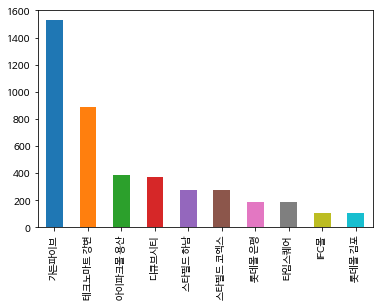

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count.plot(kind='bar')

In [6]:
# 가든파이브에 매장이 진짜 많네 어떤게 있을까
df.loc[df['Name']=='가든파이브'].head()

,No,Name,Store_name,Franchise,Category,Luxury
1817,1818,가든파이브,리틀갤러리가바,개인,식음료,0
1818,1819,가든파이브,비에이치씨 가든파이브,프랜차이즈,식음료,0
1819,1820,가든파이브,에스피커뮤니티,개인,식음료,0
1820,1821,가든파이브,CAFE올리브,개인,식음료,0
1821,1822,가든파이브,GS25 가든파이브,프랜차이즈,식음료,0


In [7]:
pd.crosstab(
    df.Name,
    df.Category,
    margins=True,
)

Category,기타,식음료,전자,패션,All
Name,,,,,
IFC몰,3,45,2,58,108
가든파이브,787,86,96,558,1527
디큐브시티,12,75,9,274,370
롯데몰 김포,7,43,1,52,103
롯데몰 은평,14,51,2,122,189
스타필드 코엑스,25,99,3,147,274
스타필드 하남,33,53,2,186,274
아이파크몰 용산,40,78,3,262,383
타임스퀘어,15,69,1,101,186


# 참조 [pandas.DataFrame.unstack](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

In [8]:
df.groupby(["Name", "Category"]).size().unstack(1)

Category,기타,식음료,전자,패션
Name,,,,
IFC몰,3,45,2,58
가든파이브,787,86,96,558
디큐브시티,12,75,9,274
롯데몰 김포,7,43,1,52
롯데몰 은평,14,51,2,122
스타필드 코엑스,25,99,3,147
스타필드 하남,33,53,2,186
아이파크몰 용산,40,78,3,262
타임스퀘어,15,69,1,101


In [9]:
temp_df = df.groupby(["Name", "Category"]).size().unstack(0)
temp_df

Name,IFC몰,가든파이브,디큐브시티,롯데몰 김포,롯데몰 은평,스타필드 코엑스,스타필드 하남,아이파크몰 용산,타임스퀘어,테크노마트 강변
Category,,,,,,,,,,
기타,3,787,12,7,14,25,33,40,15,54
식음료,45,86,75,43,51,99,53,78,69,81
전자,2,96,9,1,2,3,2,3,1,631
패션,58,558,274,52,122,147,186,262,101,120


In [10]:
# temp_df.sum(axis=1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Name,IFC몰,가든파이브,디큐브시티,롯데몰 김포,롯데몰 은평,스타필드 코엑스,스타필드 하남,아이파크몰 용산,타임스퀘어,테크노마트 강변
Category,,,,,,,,,,
기타,0.003030,0.794949,0.012121,0.007071,0.014141,0.025253,0.033333,0.040404,0.015152,0.054545
식음료,0.066176,0.126471,0.110294,0.063235,0.075000,0.145588,0.077941,0.114706,0.101471,0.119118
전자,0.002667,0.128000,0.012000,0.001333,0.002667,0.004000,0.002667,0.004000,0.001333,0.841333
패션,0.030851,0.296809,0.145745,0.027660,0.064894,0.078191,0.098936,0.139362,0.053723,0.063830


# 데이터 시각화

In [11]:
plt.rcParams['figure.figsize'] = (15,10)

import matplotlib 
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

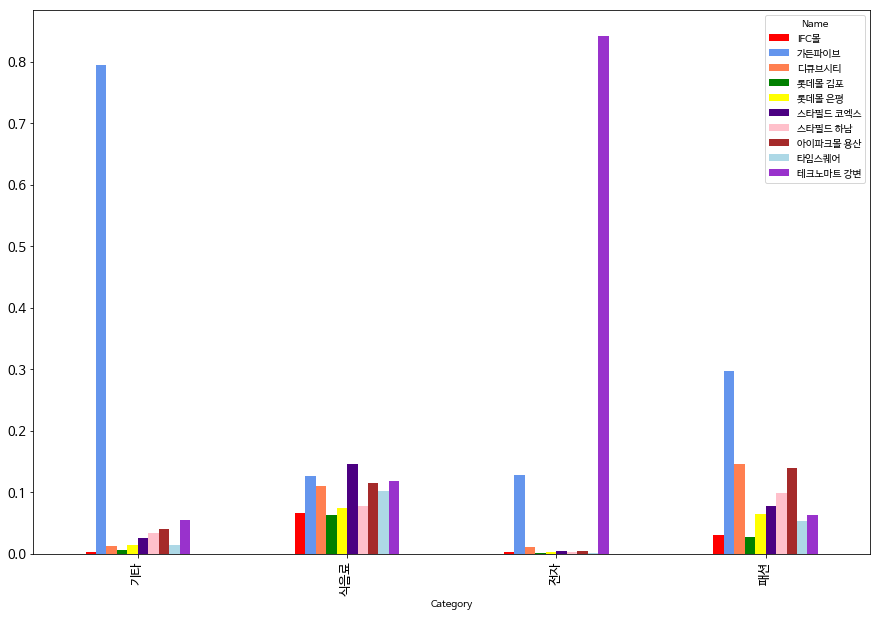

In [12]:
result_df.plot.bar(color=["red", "cornflowerblue","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"])
# 지원 => Matplotlib A

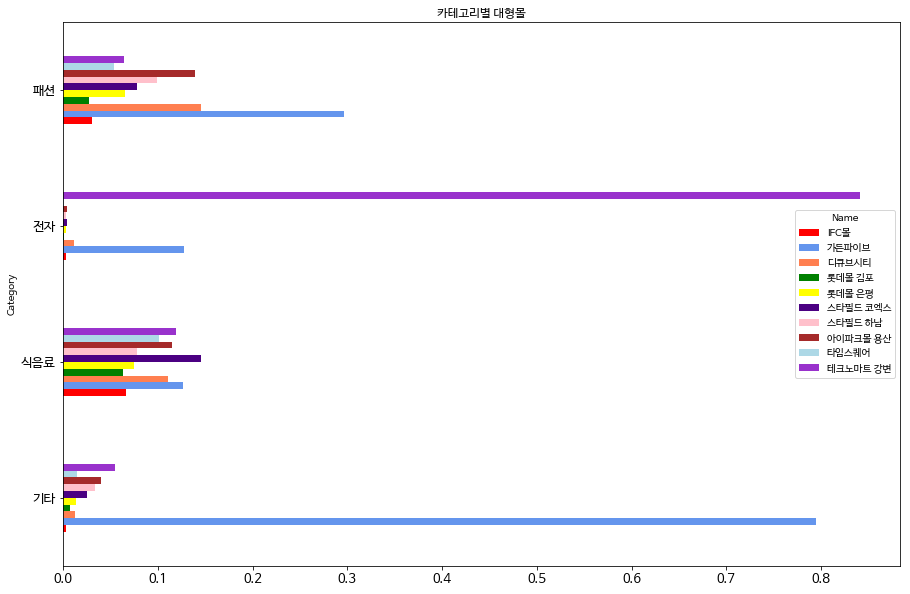

In [13]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = result_df.plot(kind="barh", title="카테고리별 대형몰",color=["red", "cornflowerblue","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"])

matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

# DataFrame. plot ( option )

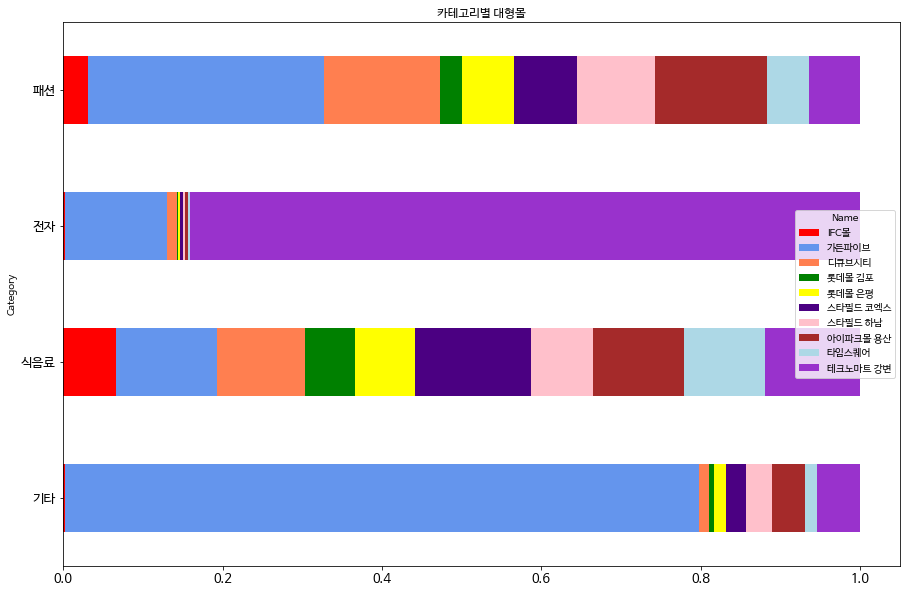

In [14]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = result_df.plot(kind="barh", title="카테고리별 대형몰", stacked=True,color=["red", "cornflowerblue","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"])
ax
# DataFrame. plot ( option )
# import seaborn as sns

In [15]:
df.groupby(["Name", "Category","Franchise"]).size().unstack(1)

Category               기타   식음료     전자     패션
Name     Franchise                           
IFC몰     개인           NaN  19.0    NaN   11.0
         프랜차이즈        3.0  26.0    2.0   47.0
가든파이브    개인         765.0  64.0   95.0  327.0
         프랜차이즈       22.0  22.0    1.0  231.0
디큐브시티    개인           1.0  22.0    NaN   28.0
         프랜차이즈       11.0  53.0    9.0  246.0
롯데몰 김포   개인           1.0   1.0    NaN    1.0
         프랜차이즈        6.0  42.0    1.0   51.0
롯데몰 은평   개인           4.0   7.0    NaN   11.0
         프랜차이즈       10.0  44.0    2.0  111.0
스타필드 코엑스 개인           4.0   1.0    NaN   13.0
         프랜차이즈       21.0  98.0    3.0  134.0
스타필드 하남  개인           NaN   NaN    NaN    1.0
         프랜차이즈       33.0  53.0    2.0  185.0
아이파크몰 용산 개인           7.0   NaN    NaN    3.0
         프랜차이즈       33.0  78.0    3.0  259.0
타임스퀘어    개인           7.0  15.0    NaN   16.0
         프랜차이즈        8.0  54.0    1.0   85.0
테크노마트 강변 개인          41.0  63.0  614.0   90.0
         프랜차이즈       13.0  18.0   17.0   30.0

In [16]:
df.groupby(["Name", "Category"]).size().unstack(1)

Category,기타,식음료,전자,패션
Name,,,,
IFC몰,3,45,2,58
가든파이브,787,86,96,558
디큐브시티,12,75,9,274
롯데몰 김포,7,43,1,52
롯데몰 은평,14,51,2,122
스타필드 코엑스,25,99,3,147
스타필드 하남,33,53,2,186
아이파크몰 용산,40,78,3,262
타임스퀘어,15,69,1,101


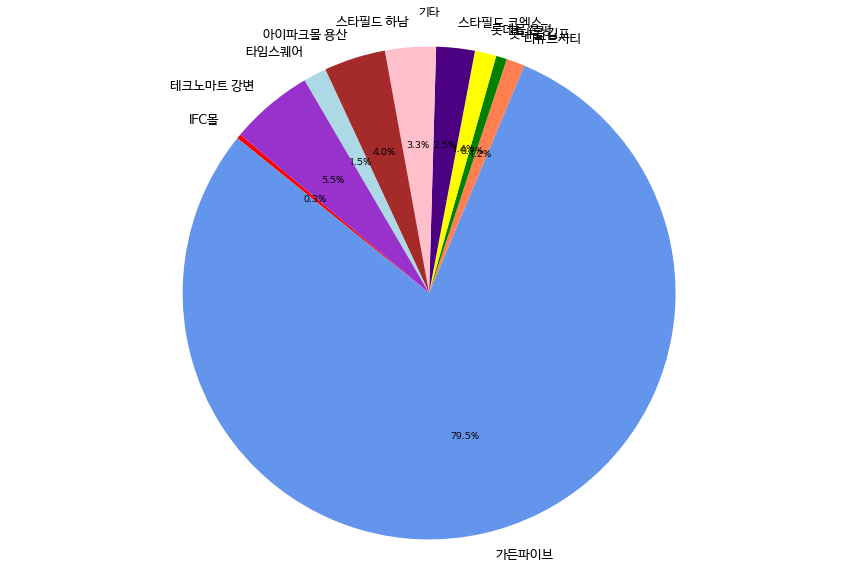

In [17]:
labels = 'IFC몰', '가든파이브', '디큐브시티', '롯데몰 김포', '롯데몰 은평','스타필드 코엑스', '스타필드 하남', '아이파크몰 용산', '타임스퀘어', '테크노마트 강변'
sizes = [3, 787, 12, 7, 14, 25, 33, 40, 15, 54]

color=["red", "cornflowerblue","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"]
plt.title('기타')
# Plot
plt.pie(sizes, labels=labels, colors=color,
       autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

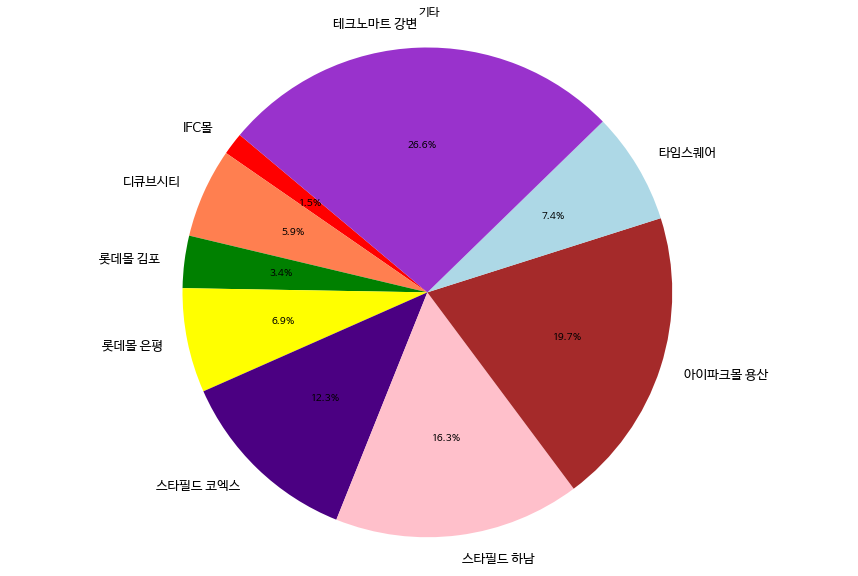

In [18]:
labels = 'IFC몰', '디큐브시티', '롯데몰 김포', '롯데몰 은평','스타필드 코엑스', '스타필드 하남', '아이파크몰 용산', '타임스퀘어', '테크노마트 강변'
sizes = [3, 12, 7, 14, 25, 33, 40, 15, 54]

color=["red","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"]
plt.title('기타')
# Plot
plt.pie(sizes, labels=labels, colors=color,
       autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

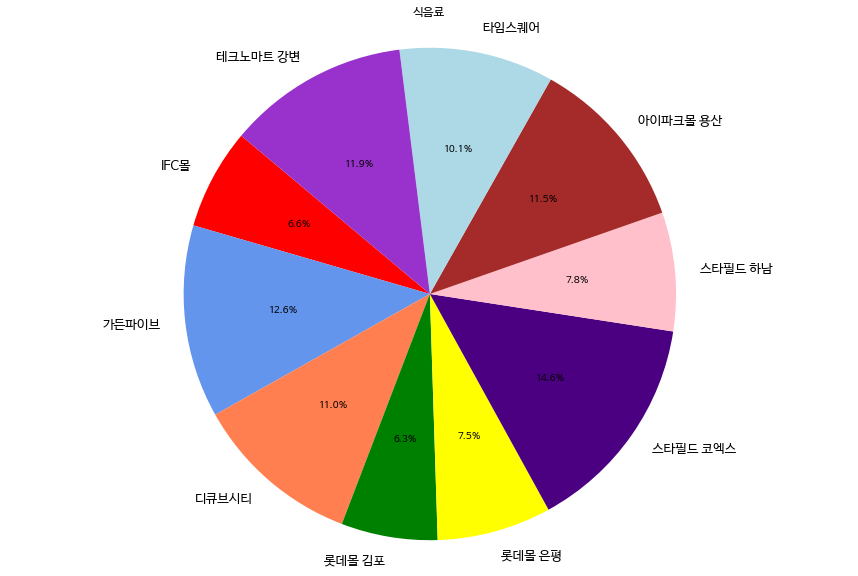

In [19]:
labels = 'IFC몰', '가든파이브', '디큐브시티', '롯데몰 김포', '롯데몰 은평','스타필드 코엑스', '스타필드 하남', '아이파크몰 용산', '타임스퀘어', '테크노마트 강변'
sizes = [45, 86, 75, 43, 51, 99, 53, 78, 69, 81]


color=["red", "cornflowerblue","coral","green","yellow","indigo","pink","brown","lightblue","darkorchid"]

# Plot
plt.title('식음료')
plt.pie(sizes, labels=labels, colors=color,
       autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

# 대형몰별 어떤 카테고리가 많을까?

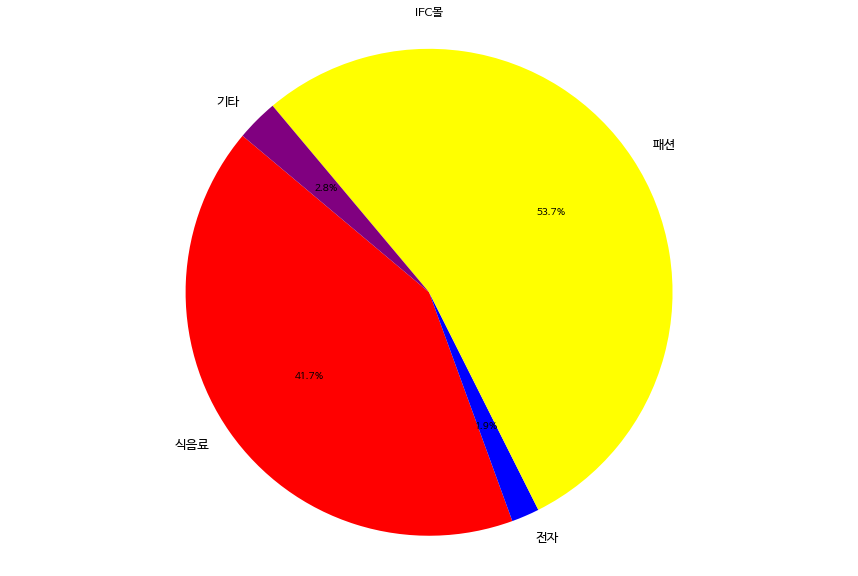

In [20]:
labels = '식음료', '전자', '패션', '기타'
sizes = [45, 2, 58, 3]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('IFC몰') 
plt.axis('equal')
plt.show()

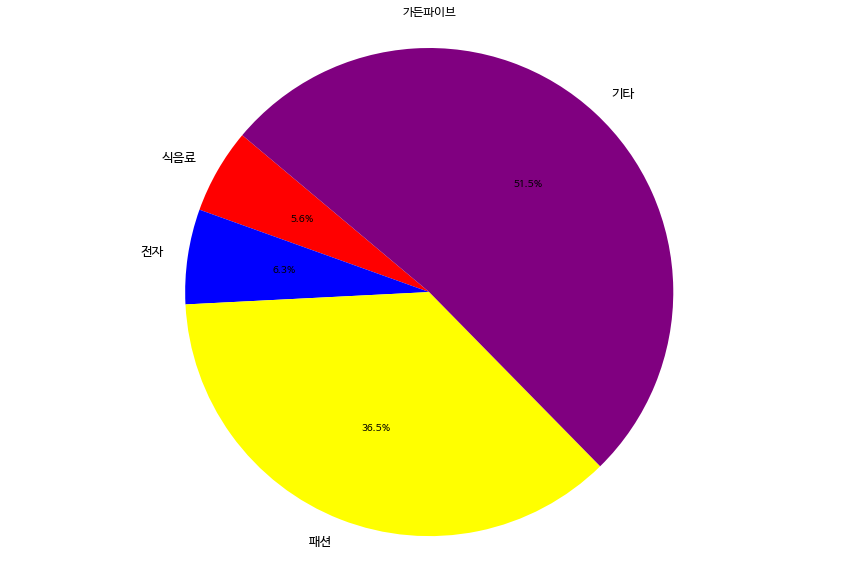

In [21]:
labels = '식음료', '전자', '패션', '기타'
sizes = [86, 96, 558, 787]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('가든파이브') 
plt.axis('equal')
plt.show()

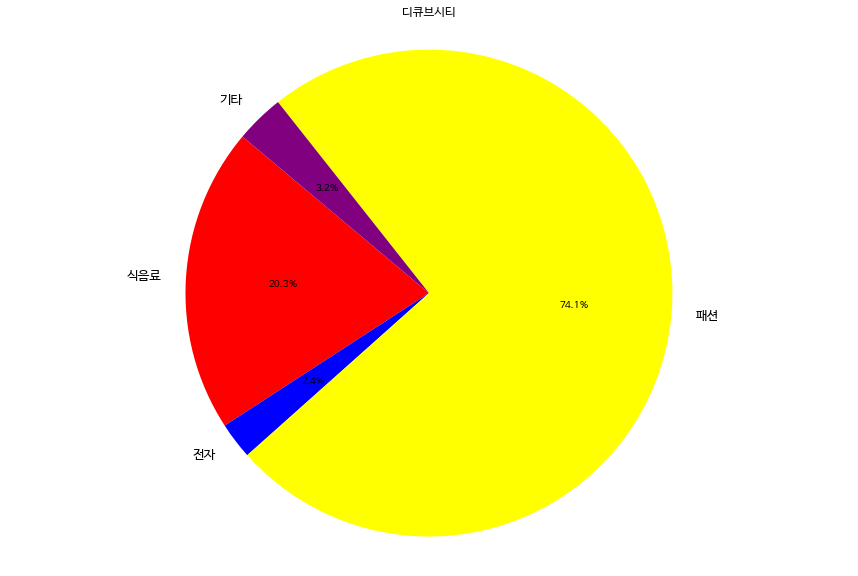

In [22]:
labels = '식음료', '전자', '패션', '기타'
sizes = [75, 9, 274, 12]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('디큐브시티') 
plt.axis('equal')
plt.show()

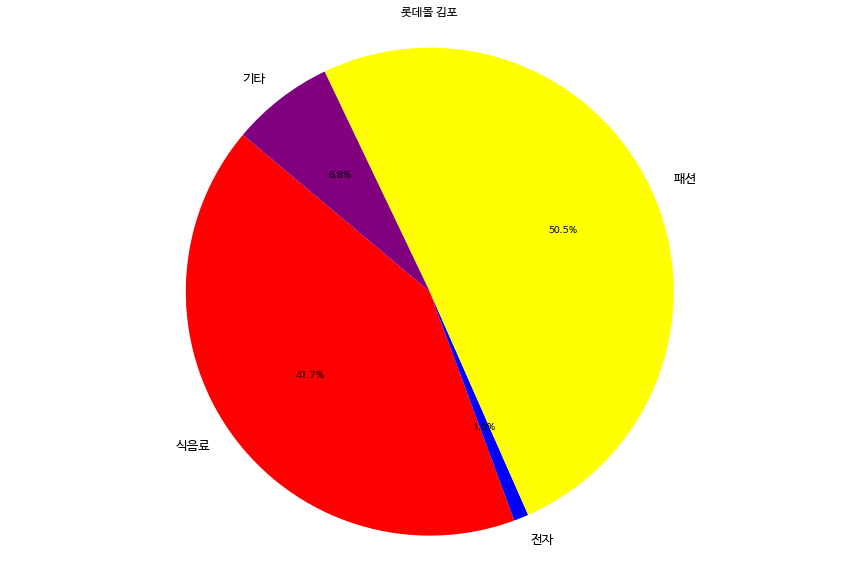

In [23]:
labels = '식음료', '전자', '패션', '기타'
sizes = [43, 1, 52, 7]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('롯데몰 김포') 
plt.axis('equal')
plt.show()

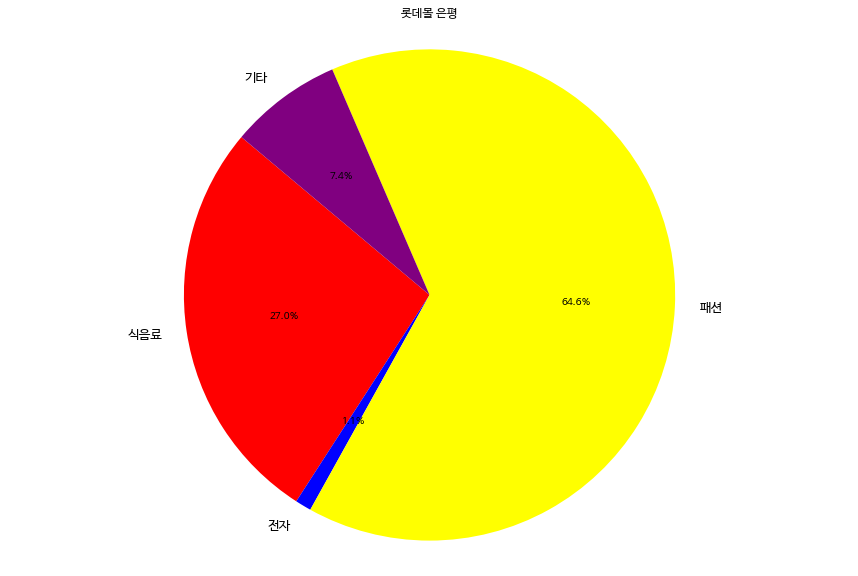

In [24]:
labels = '식음료', '전자', '패션', '기타'
sizes = [51, 2, 122, 14]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('롯데몰 은평') 
plt.axis('equal')
plt.show()

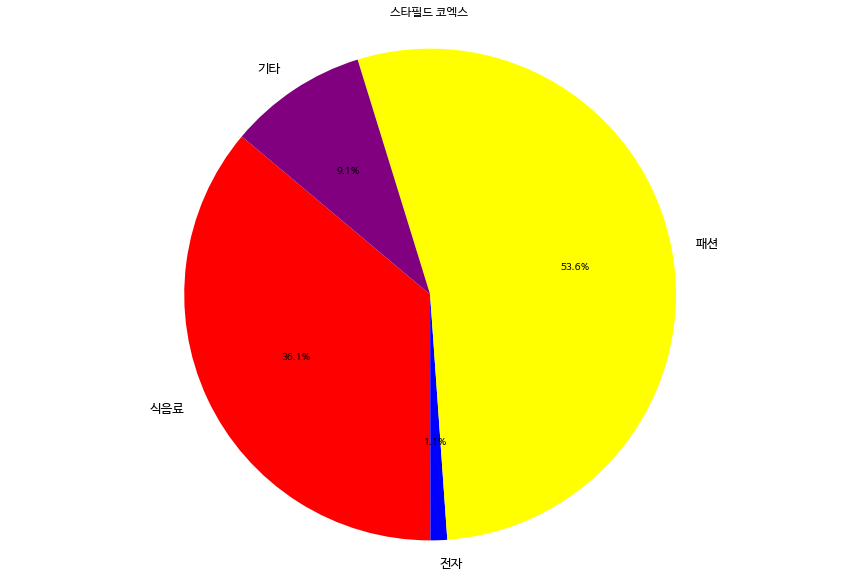

In [25]:
labels = '식음료', '전자', '패션', '기타'
sizes = [99, 3, 147, 25]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('스타필드 코엑스') 
plt.axis('equal')
plt.show()

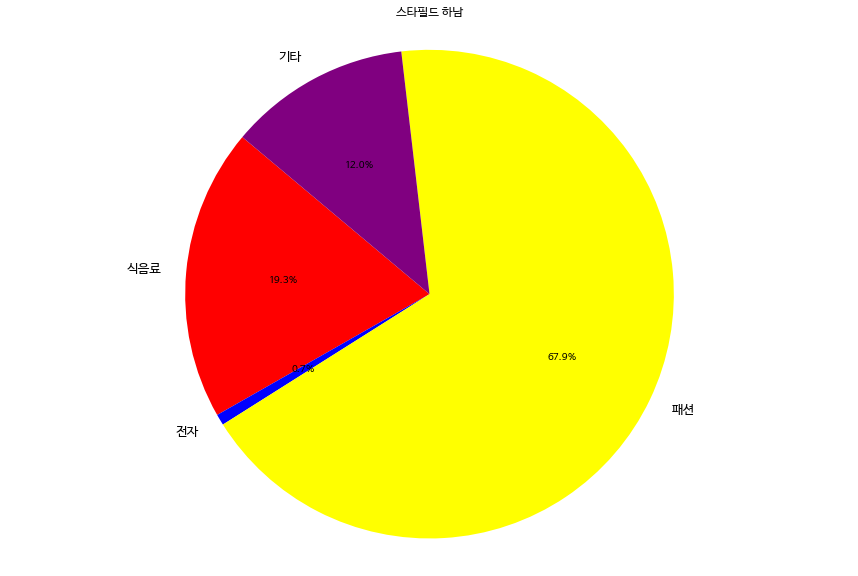

In [26]:
labels = '식음료', '전자', '패션', '기타'
sizes = [53, 2, 186, 33]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('스타필드 하남') 
plt.axis('equal')
plt.show()

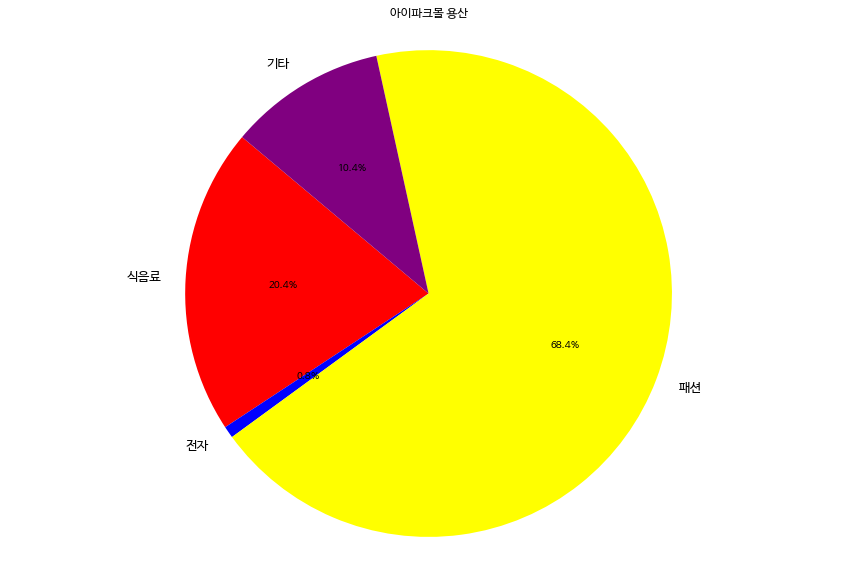

In [27]:
labels = '식음료', '전자', '패션', '기타'
sizes = [78, 3, 262, 40]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('아이파크몰 용산') 
plt.axis('equal')
plt.show()

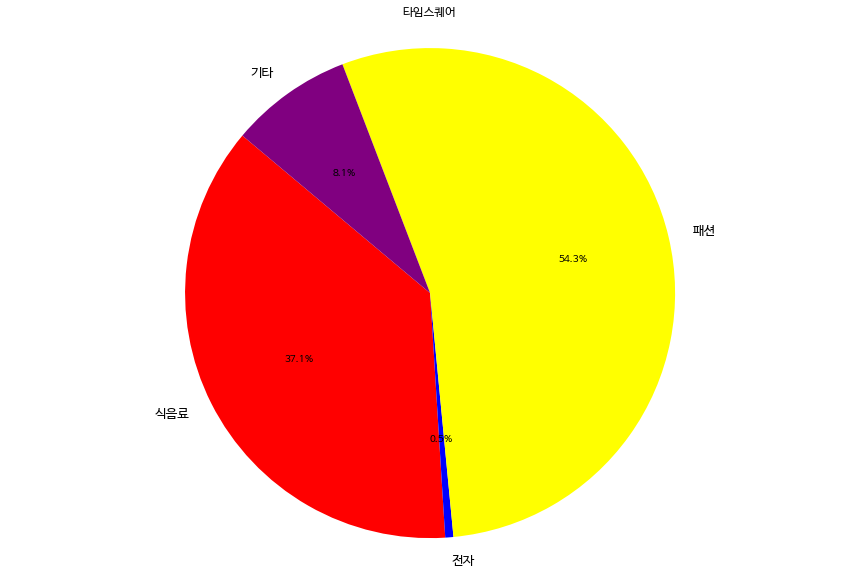

In [28]:
labels = '식음료', '전자', '패션', '기타'
sizes = [69, 1, 101, 15]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('타임스퀘어') 
plt.axis('equal')
plt.show()

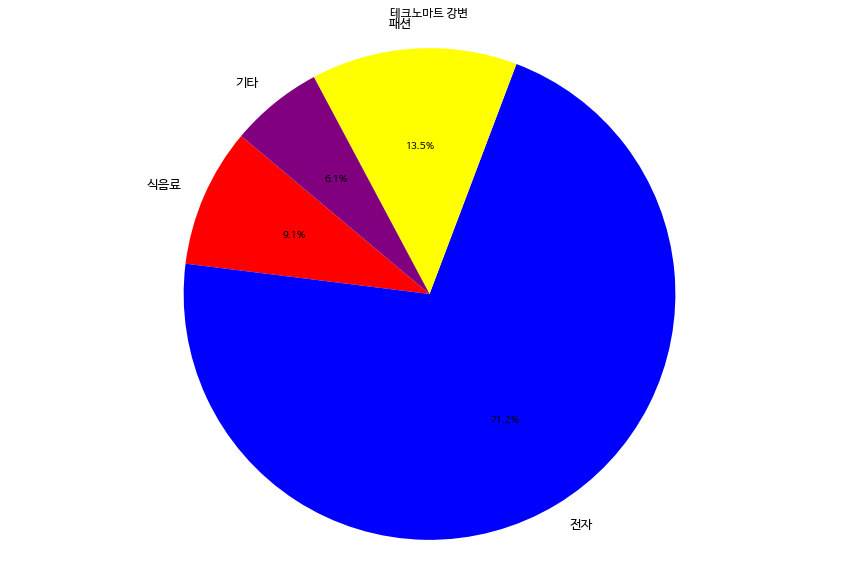

In [29]:
labels = '식음료', '전자', '패션', '기타'
sizes = [81, 631, 120, 54]

color=["red", "blue", "yellow", "purple"]
 
# Plot
plt.pie(sizes, labels=labels, colors=color,
        autopct='%1.1f%%', startangle=140)

plt.title('테크노마트 강변') 
plt.axis('equal')
plt.show()

![small_multi](https://user-images.githubusercontent.com/40633205/44828391-96acc180-ac52-11e8-9519-6977d933d4f3.png)
